##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [7]:
# 1

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from matplotlib.collections import LineCollection

In [8]:
# 2
scores_data = pd.read_csv("SCORES.csv")
scores = scores_data["Scores"]
hours = scores_data["Hours"]

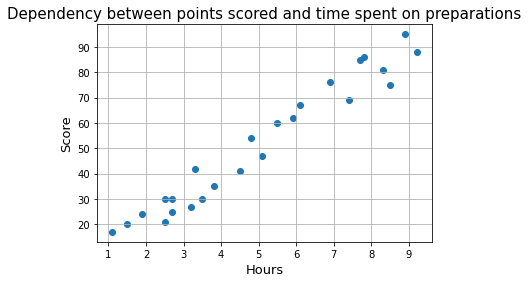

In [9]:
# 3
plt.scatter(hours, scores)
plt.xlabel("Hours", fontsize=13)
plt.ylabel("Score", fontsize=13)
plt.title("Dependency between points scored and time spent on preparations", fontsize=15)
plt.grid()
plt.show()

In [10]:
# 4
y, X = dmatrices("Scores ~ Hours", scores_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.30, random_state=0)

In [11]:
# 5
reg = LinearRegression().fit(X, y)

In [12]:
# 6
print(f'''coef_ - są to oszacowane współczynniki dla problemu regresji liniowej.\n
W naszym przypadku wynoszą one: {reg.coef_}\n\n\n''')

print(f'''intercept_ - Wyrażenie niezależne w modelu liniowym.\n
W naszym przypadku wynosi ono: {reg.intercept_}''')

coef_ - są to oszacowane współczynniki dla problemu regresji liniowej.

W naszym przypadku wynoszą one: [[0.         9.77580339]]



intercept_ - Wyrażenie niezależne w modelu liniowym.

W naszym przypadku wynosi ono: [2.48367341]


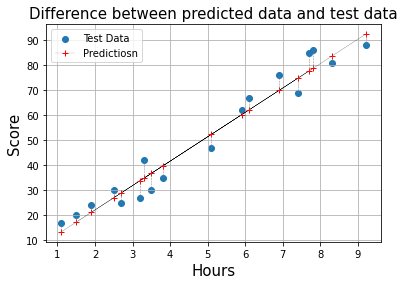

In [13]:
# 7
y_pred = reg.predict(X_test)
plt.scatter(X_test[:, 1], y_test, label="Test Data")
plt.plot(X_test[:, 1], y_pred, color="Black", linewidth=0.1, marker='+', markeredgecolor="red", label="Predictiosn")
for i in range(len(X_test[:, 1])):
    plt.plot([X_test[:, 1][i], X_test[:, 1][i]], [y_test[i],y_pred[i]], color="grey", linestyle="--", linewidth=0.5)
plt.title("Difference between predicted data and test data", fontsize=15)
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.grid()
plt.legend()
plt.show()

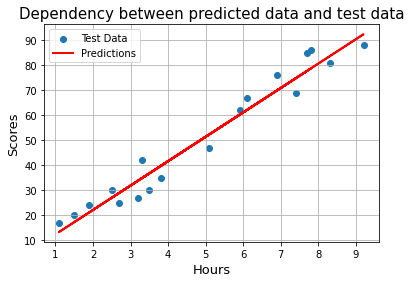

In [14]:
# 8
plt.scatter(X_test[:, 1], y_test, label="Test Data")
plt.plot(X_test[:, 1], y_pred, linewidth = 2, color="red", label="Predictions")
plt.title("Dependency between predicted data and test data", fontsize=15)
plt.xlabel("Hours", fontsize=13)
plt.ylabel("Scores", fontsize=13)
plt.legend()
plt.grid()
plt.show()

In [15]:
# 9
print(f"Średni błąd bezwzględny wynosi: {mean_absolute_error(y_test, y_pred)}")
print(f"Błąd średniokwadratowy wynosi: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Pierwiastek błędu średniokwadratowego wynosi: {mean_squared_error(y_test, y_pred, squared=True)}\n")

Średni błąd bezwzględny wynosi: 4.853830450170692
Błąd średniokwadratowy wynosi: 5.154993270750125
Pierwiastek błędu średniokwadratowego wynosi: 26.573955621479065



# Dla SBP.csv

In [16]:
# 2
sbp_data = pd.read_csv("SBP.csv")
sbp = sbp_data["SBP"]
age = sbp_data["Age"]

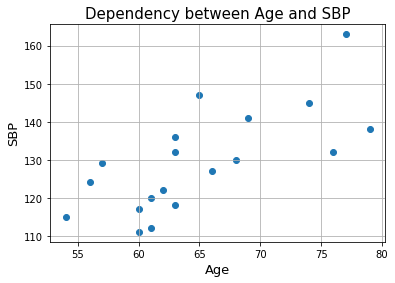

In [17]:
# 3
plt.scatter(age, sbp)
plt.xlabel("Age", fontsize=13)
plt.ylabel("SBP", fontsize=13)
plt.title("Dependency between Age and SBP", fontsize=15)
plt.grid()
plt.show()

In [18]:
# 4
y, X = dmatrices("SBP ~ Age", sbp_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.30, random_state=0)

In [19]:
# 5
reg = LinearRegression().fit(X, y)

In [20]:
# 6
print(f'''coef_ : {reg.coef_}\n\n\n''')

print(f'''intercept_ : {reg.intercept_}''')

coef_ : [[0.         1.31962701]]



intercept_ : [43.71475115]


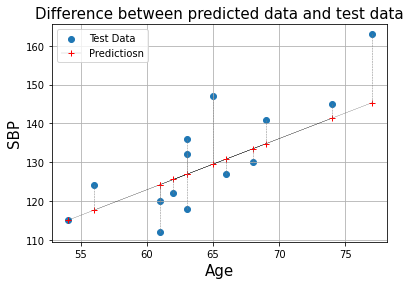

In [21]:
# 7
y_pred = reg.predict(X_test)
plt.scatter(X_test[:, 1], y_test, label="Test Data")
plt.plot(X_test[:, 1], y_pred, color="Black", linewidth=0.1, marker='+', markeredgecolor="red", label="Predictiosn")
for i in range(len(X_test[:, 1])):
    plt.plot([X_test[:, 1][i], X_test[:, 1][i]], [y_test[i],y_pred[i]], color="grey", linestyle="--", linewidth=0.5)
plt.title("Difference between predicted data and test data", fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.ylabel("SBP", fontsize=15)
plt.legend()
plt.grid()
plt.show()

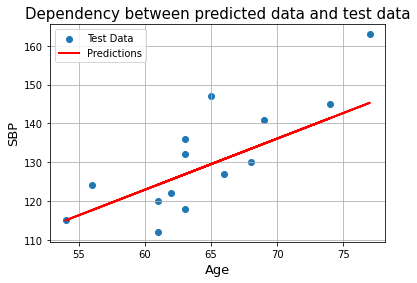

In [22]:
# 8
plt.scatter(X_test[:, 1], y_test, label="Test Data")
plt.plot(X_test[:, 1], y_pred, linewidth = 2, color="red", label="Predictions")
plt.title("Dependency between predicted data and test data", fontsize=15)
plt.xlabel("Age", fontsize=13)
plt.ylabel("SBP", fontsize=13)
plt.legend()
plt.grid()
plt.show()

In [23]:
# 9
print(f"Średni błąd bezwzględny wynosi: {mean_absolute_error(y_test, y_pred)}")
print(f"Błąd średniokwadratowy wynosi: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Pierwiastek błędu średniokwadratowego wynosi: {mean_squared_error(y_test, y_pred, squared=True)}\n")

Średni błąd bezwzględny wynosi: 7.273051182050173
Błąd średniokwadratowy wynosi: 8.888488436626385
Pierwiastek błędu średniokwadratowego wynosi: 79.00522668804096



### Czy uzyskane wyniki z modelu są równie zadowalające?
W tym przypadku widać dosyć dużą różnicę pomiędzy danymi testowymi, a danymi przewidywanymi

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [24]:
Petrol_data = pd.read_csv("PETROL.csv")
Petrol_fuel_consumption = Petrol_data["Zuzycie_paliwa"]
Petrol_fuel_tax = Petrol_data["Podatek_paliwowy"]
Petrol_average_income = Petrol_data["Sredni_przychod"]
Petrol_highways = Petrol_data["Utwardzone_autostrady"]
Petrol_percentage_of_people_with_driving_licence = Petrol_data["Procent_ludnosci_z_prawem_jazdy"]

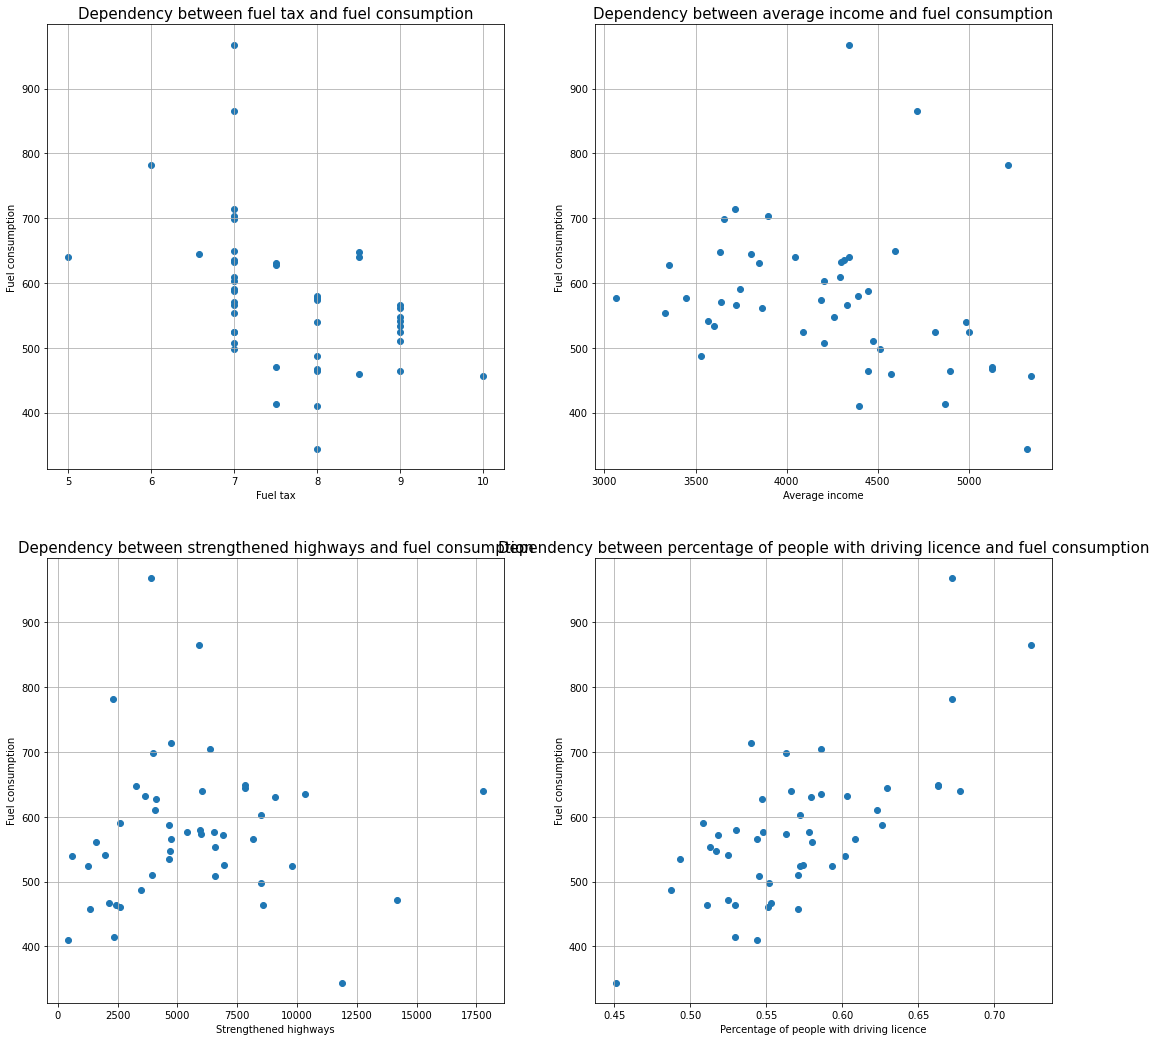

In [25]:
# 3
fig1, ax = plt.subplots(2, 2, figsize=(18,18))

# Fuel tax - fuel consumption
ax[0,0].scatter(Petrol_fuel_tax, Petrol_fuel_consumption)
ax[0,0].set_xlabel("Fuel tax")
ax[0,0].set_ylabel("Fuel consumption")
ax[0,0].set_title("Dependency between fuel tax and fuel consumption", fontsize=15)
ax[0,0].grid()

# Average income - fuel consumption
ax[0,1].scatter(Petrol_average_income, Petrol_fuel_consumption)
ax[0,1].set_xlabel("Average income")
ax[0,1].set_ylabel("Fuel consumption")
ax[0,1].set_title("Dependency between average income and fuel consumption", fontsize=15)
ax[0,1].grid()

# Strengthened highways - fuel consumption
ax[1,0].scatter(Petrol_highways, Petrol_fuel_consumption)
ax[1,0].set_xlabel("Strengthened highways")
ax[1,0].set_ylabel("Fuel consumption")
ax[1,0].set_title("Dependency between strengthened highways and fuel consumption", fontsize=15)
ax[1,0].grid()

# Percentage of people with driving licence - fuel consumption
ax[1,1].scatter(Petrol_percentage_of_people_with_driving_licence, Petrol_fuel_consumption)
ax[1,1].set_xlabel("Percentage of people with driving licence")
ax[1,1].set_ylabel("Fuel consumption")
ax[1,1].set_title("Dependency between percentage of people with driving licence and fuel consumption", fontsize=15)
ax[1,1].grid()

plt.show()

In [26]:
# 4
y1, X1 = dmatrices("Zuzycie_paliwa ~ Podatek_paliwowy", Petrol_data)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.30, random_state=0)

y2, X2 = dmatrices("Zuzycie_paliwa ~ Sredni_przychod", Petrol_data)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.30, random_state=0)

y3, X3 = dmatrices("Zuzycie_paliwa ~ Utwardzone_autostrady", Petrol_data)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, train_size=0.30, random_state=0)

y4, X4 = dmatrices("Zuzycie_paliwa ~ Procent_ludnosci_z_prawem_jazdy", Petrol_data)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, train_size=0.30, random_state=0)

In [27]:
# 5
reg1 = LinearRegression().fit(X1, y1)
reg2 = LinearRegression().fit(X2, y2)
reg3 = LinearRegression().fit(X3, y3)
reg4 = LinearRegression().fit(X4, y4)

In [28]:
# 6
print(f'''For fuel tax:\n''')
print(f'''coef_ : {reg1.coef_}''')
print(f'''intercept_ : {reg1.intercept_}\n\n\n''')

print(f'''For average income:\n''')
print(f'''coef_ dla średnich dochodów: {reg2.coef_}''')
print(f'''intercept_ : {reg2.intercept_}\n\n\n''')

print(f'''For strengthened higways:\n''')
print(f'''coef_ : {reg3.coef_}''')
print(f'''intercept_ : {reg3.intercept_}\n\n\n''')

print(f'''For percentage of people with driving license:\n''')
print(f'''coef_ : {reg4.coef_}''')
print(f'''intercept_ : {reg4.intercept_}\n\n\n''')

For fuel tax:

coef_ : [[  0.         -53.10629788]]
intercept_ : [984.00762756]



For average income:

coef_ dla średnich dochodów: [[ 0.         -0.04776056]]
intercept_ : [779.36317309]



For strengthened higways:

coef_ : [[0.        0.0006102]]
intercept_ : [573.37480782]



For percentage of people with driving license:

coef_ : [[   0.         1409.84211133]]
intercept_ : [-227.30911749]





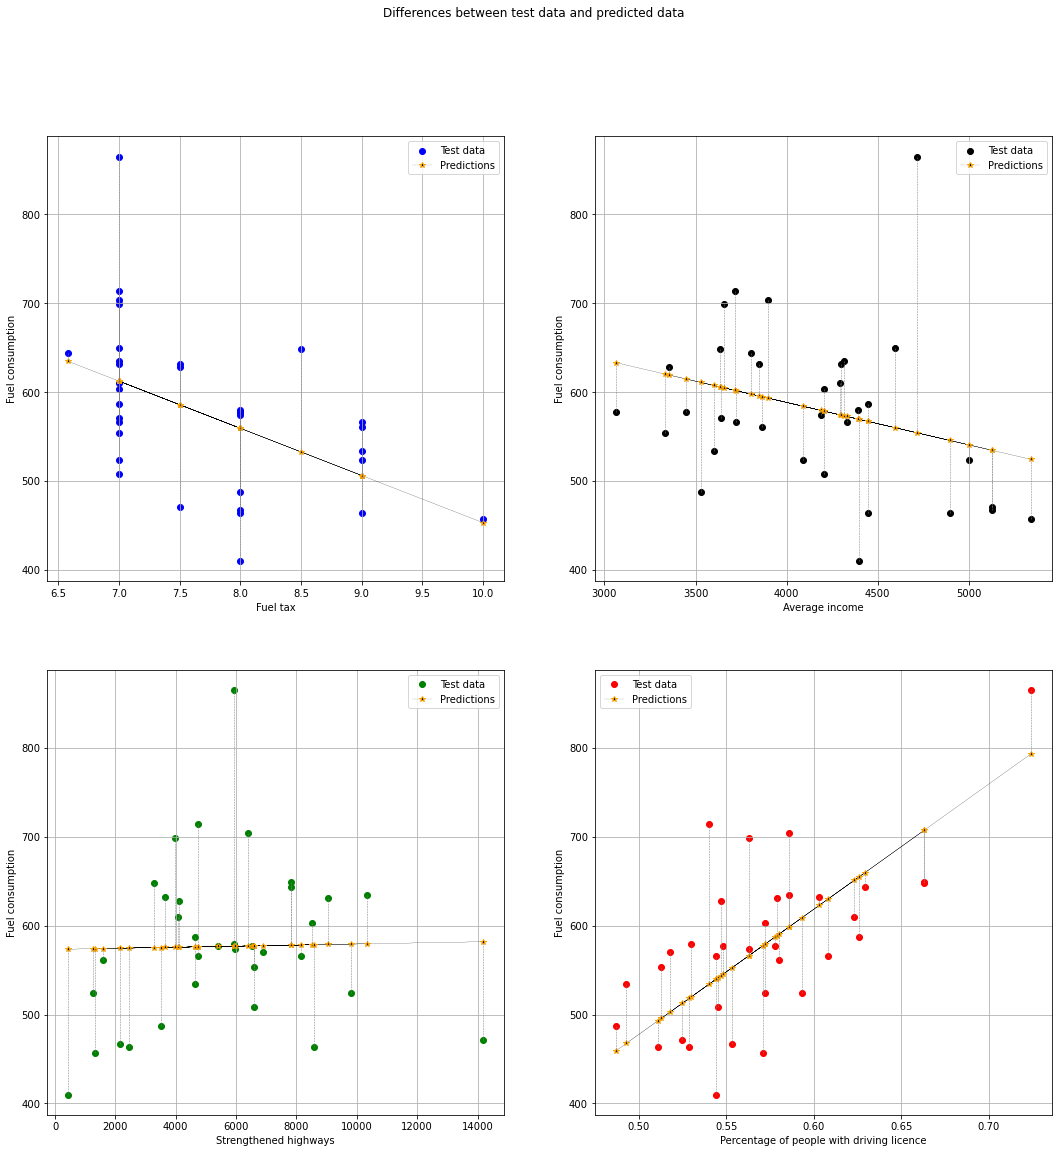

In [29]:
# 7
y_pred1 = reg1.predict(X_test1)
y_pred2 = reg2.predict(X_test2)
y_pred3 = reg3.predict(X_test3)
y_pred4 = reg4.predict(X_test4)

fig, ax = plt.subplots(2,2, figsize=(18,18))
ax[0,0].scatter(X_test1[:, 1], y_test1, c="Blue", label="Test data")
ax[0,0].plot(X_test1[:, 1], y_pred1, color="black", linewidth=0.1, marker='*', markeredgecolor="orange", label="Predictions")
for i in range(len(X_test1[:, 1])):
    ax[0,0].plot([X_test1[:, 1][i], X_test1[:, 1][i]], [y_test1[i],y_pred1[i]], color="grey", linestyle="--", linewidth=0.5)
ax[0,0].set_xlabel("Fuel tax")
ax[0,0].set_ylabel("Fuel consumption")
ax[0,0].legend()
ax[0,0].grid()

ax[0,1].scatter(X_test2[:, 1], y_test2, c="Black", label="Test data")
ax[0,1].plot(X_test2[:, 1], y_pred2, color="black", linewidth=0.1, marker='*', markeredgecolor="orange", label="Predictions")
for i in range(len(X_test2[:, 1])):
    ax[0,1].plot([X_test2[:, 1][i], X_test2[:, 1][i]], [y_test2[i],y_pred2[i]], color="grey", linestyle="--", linewidth=0.5)
ax[0,1].set_xlabel("Average income")
ax[0,1].set_ylabel("Fuel consumption")
ax[0,1].legend()
ax[0,1].grid()

ax[1,0].scatter(X_test3[:, 1], y_test3, c="Green", label="Test data")
ax[1, 0].plot(X_test3[:, 1], y_pred3, color="black", linewidth=0.1, marker='*', markeredgecolor="orange", label="Predictions")
for i in range(len(X_test3[:, 1])):
    ax[1,0].plot([X_test3[:, 1][i], X_test3[:, 1][i]], [y_test3[i],y_pred3[i]], color="grey", linestyle="--", linewidth=0.5)
ax[1,0].set_xlabel("Strengthened highways")
ax[1,0].set_ylabel("Fuel consumption")
ax[1,0].legend()
ax[1,0].grid()

ax[1,1].scatter(X_test4[:, 1], y_test4, c="Red", label="Test data")
ax[1,1].plot(X_test4[:, 1], y_pred4, color="black", linewidth=0.1, marker='*', markeredgecolor="orange", label="Predictions")
for i in range(len(X_test4[:, 1])):
    ax[1,1].plot([X_test4[:, 1][i], X_test4[:, 1][i]], [y_test4[i],y_pred4[i]], color="grey", linestyle="--", linewidth=0.5)
ax[1,1].set_xlabel("Percentage of people with driving licence")
ax[1,1].set_ylabel("Fuel consumption")
ax[1,1].legend()
ax[1,1].grid()

fig.suptitle("Differences between test data and predicted data")
plt.show()

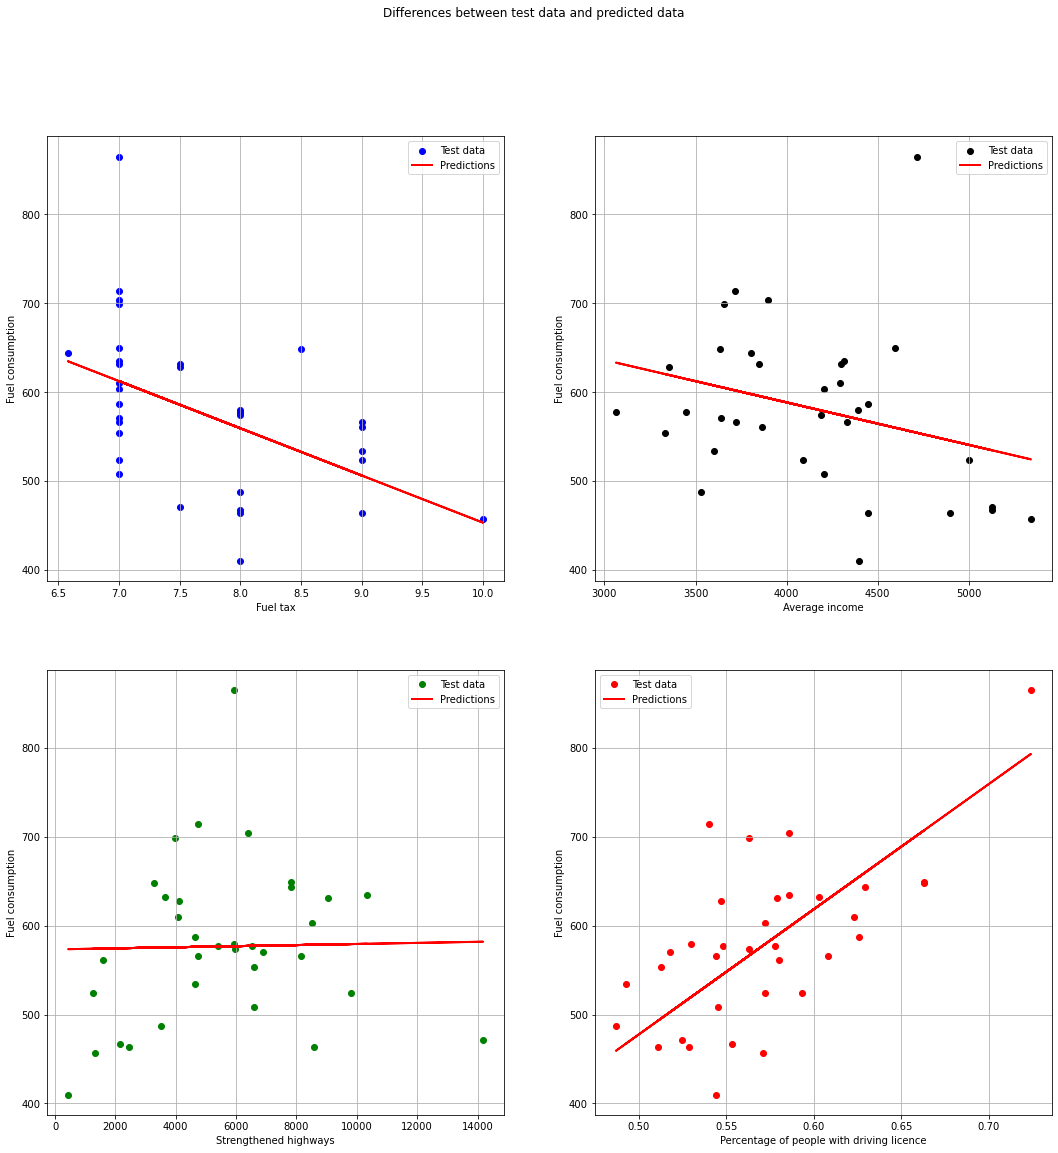

In [30]:
# 8
fig, ax = plt.subplots(2,2, figsize=(18,18))
ax[0,0].scatter(X_test1[:, 1], y_test1, c="Blue", label="Test data")
ax[0,0].plot(X_test1[:, 1], y_pred1, color="red", linewidth=2, label="Predictions")
ax[0,0].set_xlabel("Fuel tax")
ax[0,0].set_ylabel("Fuel consumption")
ax[0,0].legend()
ax[0,0].grid()

ax[0,1].scatter(X_test2[:, 1], y_test2, c="Black", label="Test data")
ax[0,1].plot(X_test2[:, 1], y_pred2, color="red", linewidth=2, label="Predictions")
ax[0,1].set_xlabel("Average income")
ax[0,1].set_ylabel("Fuel consumption")
ax[0,1].legend()
ax[0,1].grid()

ax[1,0].scatter(X_test3[:, 1], y_test3, c="Green", label="Test data")
ax[1,0].plot(X_test3[:, 1], y_pred3, color="red", linewidth=2, label="Predictions")
ax[1,0].set_xlabel("Strengthened highways")
ax[1,0].set_ylabel("Fuel consumption")
ax[1,0].legend()
ax[1,0].grid()

ax[1,1].scatter(X_test4[:, 1], y_test4, c="Red", label="Test data")
ax[1,1].plot(X_test4[:, 1], y_pred4, color="red", linewidth=2, label="Predictions")
ax[1,1].set_xlabel("Percentage of people with driving licence")
ax[1,1].set_ylabel("Fuel consumption")
ax[1,1].legend()
ax[1,1].grid()

fig.suptitle("Differences between test data and predicted data")
plt.show()

In [31]:
# 9
print(f"Średni błąd bezwzględny dla Podatek_paliwowy wynosi: {mean_absolute_error(y_test1, y_pred1)}")
print(f"Błąd średniokwadratowy dla Podatek_paliwowy wynosi: {mean_squared_error(y_test1, y_pred1, squared=False)}")
print(f"Pierwiastek błędu średniokwadratowego dla Podatek_paliwowy wynosi: {mean_squared_error(y_test1, y_pred1, squared=True)}\n")

print(f"Średni błąd bezwzględny dla Sredni_przychod wynosi: {mean_absolute_error(y_test2, y_pred2)}")
print(f"Błąd średniokwadratowy dla Sredni_przychod wynosi: {mean_squared_error(y_test2, y_pred2, squared=False)}")
print(f"Pierwiastek błędu średniokwadratowego dla Sredni_przychod wynosi: {mean_squared_error(y_test2, y_pred2, squared=True)}\n")

print(f"Średni błąd bezwzględny dla Utwardzone_autostrady wynosi: {mean_absolute_error(y_test3, y_pred3)}")
print(f"Błąd średniokwadratowy dla Utwardzone_autostrady wynosi: {mean_squared_error(y_test3, y_pred3, squared=False)}")
print(f"Pierwiastek błędu średniokwadratowego dla Utwardzone_autostrady wynosi: {mean_squared_error(y_test3, y_pred3, squared=True)}\n")

print(f"Średni błąd bezwzględny dla Procent_ludnosci_z_prawem_jazdy wynosi: {mean_absolute_error(y_test4, y_pred4)}")
print(f"Błąd średniokwadratowy dla Procent_ludnosci_z_prawem_jazdy wynosi: {mean_squared_error(y_test4, y_pred4, squared=False)}")
print(f"Pierwiastek błędu średniokwadratowego dla Procent_ludnosci_z_prawem_jazdy wynosi: {mean_squared_error(y_test4, y_pred4, squared=True)}\n")

Średni błąd bezwzględny dla Podatek_paliwowy wynosi: 58.86127579587886
Błąd średniokwadratowy dla Podatek_paliwowy wynosi: 77.69613162202378
Pierwiastek błędu średniokwadratowego dla Podatek_paliwowy wynosi: 6036.688869026843

Średni błąd bezwzględny dla Sredni_przychod wynosi: 65.36202866725114
Błąd średniokwadratowy dla Sredni_przychod wynosi: 85.92697811788541
Pierwiastek błędu średniokwadratowego dla Sredni_przychod wynosi: 7383.445568471558

Średni błąd bezwzględny dla Utwardzone_autostrady wynosi: 66.86951482921125
Błąd średniokwadratowy dla Utwardzone_autostrady wynosi: 89.48471549020195
Pierwiastek błędu średniokwadratowego dla Utwardzone_autostrady wynosi: 8007.51430636239

Średni błąd bezwzględny dla Procent_ludnosci_z_prawem_jazdy wynosi: 59.144240012473816
Błąd średniokwadratowy dla Procent_ludnosci_z_prawem_jazdy wynosi: 70.62692610511928
Pierwiastek błędu średniokwadratowego dla Procent_ludnosci_z_prawem_jazdy wynosi: 4988.16269105798



### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [32]:
# 2 and 3
heart_data = pd.read_csv("HEART.csv")
heart_data = heart_data.replace("?", np.nan)  # Replacing ? by NaN

heart_data = heart_data.drop("slope", axis=1) # |
heart_data = heart_data.drop("ca", axis=1)    # | --> Removing 3 columns with lots of NaN
heart_data = heart_data.drop("thal", axis=1)  # |

heart_data.dropna(inplace=True)               # Removing rows with NaN

pd.set_option('display.max_rows', 261)
pd.set_option('display.max_columns', 11)


In [33]:
# 4
dummy_cp = pd.get_dummies(heart_data["cp"], prefix="cp")
dummy_restecg = pd.get_dummies(heart_data["restecg"], prefix="restecg")
dummy = heart_data[["fbs", "sex", "exang"]].join(dummy_cp)
dummy = dummy.join(dummy_restecg)
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0
6,32,1,2,110,225,0,0,184,0,0.0,0
7,32,1,2,125,254,0,0,155,0,0.0,0
8,33,1,3,120,298,0,0,185,0,0.0,0
9,34,0,2,130,161,0,0,190,0,0.0,0
10,34,1,2,150,214,0,1,168,0,0.0,0


In [34]:
# 5
num_data = heart_data['num']
X = dummy.loc[:, dummy.columns]
y = num_data

In [35]:
# 6 
log_reg = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

In [36]:
# 7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.20, random_state=0)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       137
           1       0.80      0.62      0.70        72

    accuracy                           0.82       209
   macro avg       0.81      0.77      0.79       209
weighted avg       0.82      0.82      0.81       209

